In [1]:
%matplotlib inline

# loading pacakages for EDA

import numpy as np # Linear algebra
import pandas as pd # data processing, scv file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization library
import matplotlib

# split data into train and test sample
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import ShuffleSplit, cross_val_score

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


In [2]:
# listing csv file which required for data analysis
df = pd.read_csv("bengaluru_house_prices.csv")

In [3]:
# let's see some of the raws from match data
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
# checking shape of data for match record file
df.shape

(13320, 9)

In [5]:
# Grouping our data on the basis of area type

df.groupby('area_type')["area_type"].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [6]:
# creating new dataframe after droping some column from orginal dataset

new_df = df.drop(["area_type",'society','balcony','availability'],axis=1)

In [7]:
# New data frame has only five column ("location", "bhk type","total sqft","no. of bathroom","price of house" )

new_df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [8]:
# In this data we have many null value
new_df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
# droping null value

new_df = new_df.dropna()

In [68]:
new_df.head()

,location,size,total_sqft,bath,price,Bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [11]:
# In this we can see there is many mistake we considering (BHK==Bedroom)
new_df["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [12]:
# Extracting numerical value from size column 
# creating new column "Bhk"

new_df['Bhk'] = new_df['size'].apply(lambda x: int(x.split(' ')[0]))

In [13]:
# In Total_sqft column some values like('7844-8200') and like this type of data we considering range

new_df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [14]:
# with the help of function we are converting this range data into a "mean(float)" value 

def convert_sqft_to_num(x):
    area = x.split("-")
    if len(area)==2:
        return (float(area[0]) + float(area[1]))/2
    try:
        return float(x)
    except:
        return None

In [15]:
# creating a copy of orginal dataset
# and using above function for conversion of "total_sqft" column
new_df1 = new_df.copy()
new_df1["total_sqft"] = new_df1["total_sqft"].apply(convert_sqft_to_num)

In [16]:
# Now our dataset have 1 extra column Bhk

new_df1.head(10)

,location,size,total_sqft,bath,price,Bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [17]:
new_df1.loc[410]

location      Kengeri
size            1 BHK
total_sqft        NaN
bath              1.0
price            18.5
Bhk                 1
Name: 410, dtype: object

In [18]:
# we can see in total_sqft column we have some NaN value

new_df1.isnull().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
Bhk            0
dtype: int64

In [19]:
# calculation price for per sqft 
# Given price in lakh
# now we have one more column "price_per_sqft"

new_df1['price_per_sqft'] = new_df1['price']*100000/new_df1['total_sqft']

In [20]:
new_df1.head()

,location,size,total_sqft,bath,price,Bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [21]:
# In our data set we have 1304 different location

len(new_df1['location'].unique())

1304

In [22]:
# there are many location which have values 1,2..10

new_df1.location = new_df1.location.apply(lambda x: x.strip())

location_stats = new_df1.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [23]:
# which cities have count less then 10 we are considering that as "other"
location_stats_less_then_10 = location_stats[location_stats<10]

In [24]:
new_df1["location"] = new_df1.location.apply(lambda x: 'other' if x in location_stats_less_then_10 else x)

In [25]:
# now we have only 255 location
len(new_df1['location'].unique())

255

In [26]:
new_df1.loc[5:10]

,location,size,total_sqft,bath,price,Bhk,price_per_sqft
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804
10,Whitefield,3 BHK,1800.0,2.0,70.00,3,3888.888889


In [27]:
# filtering data on the basis of bhk area

new_df1[new_df1["total_sqft"]/new_df1["Bhk"]<200]

,location,size,total_sqft,bath,price,Bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
89,Rajaji Nagar,6 Bedroom,710.0,6.0,160.0,6,22535.211268
...,...,...,...,...,...,...,...
13073,Nagarbhavi,4 Bedroom,600.0,3.0,100.0,4,16666.666667
13112,Nagavara,3 Bedroom,440.0,3.0,35.0,3,7954.545455
13198,other,8 Bedroom,1200.0,8.0,140.0,8,11666.666667
13221,other,9 Bedroom,1178.0,9.0,75.0,9,6366.723260


In [29]:
new_df1.shape

(13246, 7)

In [28]:
# removing outlier from dataset
# we know we can't make bedrrom in less then 22-sqft area so we are considering it as a outlier 

df1 = new_df1[~(new_df1["total_sqft"]/new_df1["Bhk"]<200)]

In [30]:
df1.shape

(12906, 7)

In [31]:
df1["price_per_sqft"].describe()

count     12860.000000
mean       6496.719070
std        4344.787424
min         267.829813
25%        4240.119848
50%        5357.142857
75%        7094.306991
max      176470.588235
Name: price_per_sqft, dtype: float64

In [32]:
# removing outlier from dataset 
# now we are removing outlier on the basis of price we are taking only price b/w {(mean-std) to (m+std)}

def removal_price_per_sqft_outlier(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf["price_per_sqft"])
        st = np.std(subdf["price_per_sqft"])
        reduced_df = subdf[(subdf["price_per_sqft"]>(m-st)) & (subdf["price_per_sqft"]<(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [33]:
df2 = removal_price_per_sqft_outlier(df1)

In [34]:
df2.shape

(10631, 7)

In [35]:
df2.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price', 'Bhk',
       'price_per_sqft'],
      dtype='object')

In [36]:

def scatter_plot_chart(df,location):
    bhk_2 = df[(df["location"]==location) & (df["Bhk"]==2)]
    bhk_3 = df[(df["location"]==location) & (df["Bhk"]==3)]
    matplotlib.rcParams["figure.figsize"] = (15,10)
    plt.scatter(bhk_2["total_sqft"],bhk_2["price"],color='blue',label="2 BHK",s=50)
    plt.scatter(bhk_3["total_sqft"],bhk_3["price"],color='green',marker='+',label='3 BHK',s=50)
    plt.xlabel("Total square feet area")
    plt.ylabel("price")
    plt.title("Location")
    plt.legend(loc="upper right")

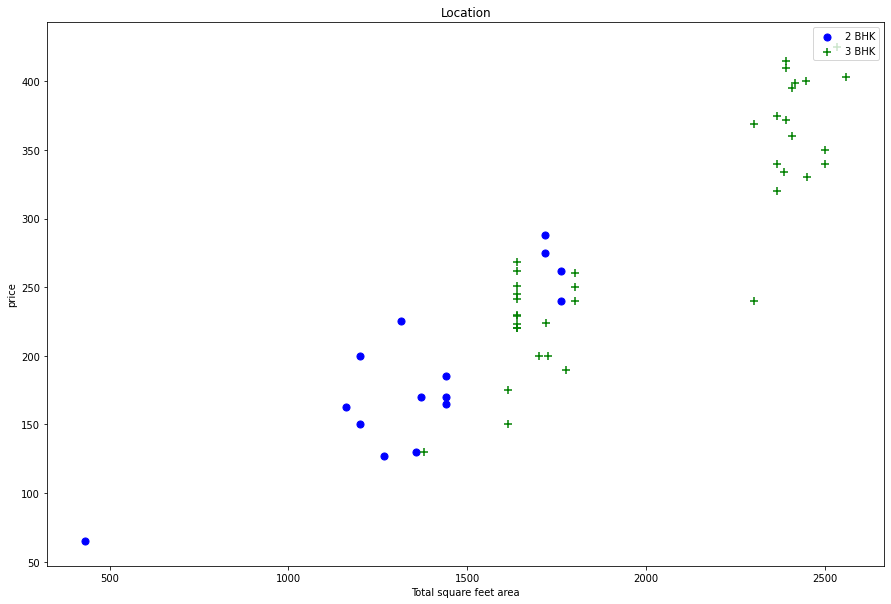

In [37]:
scatter_plot_chart(df2,"Rajaji Nagar")

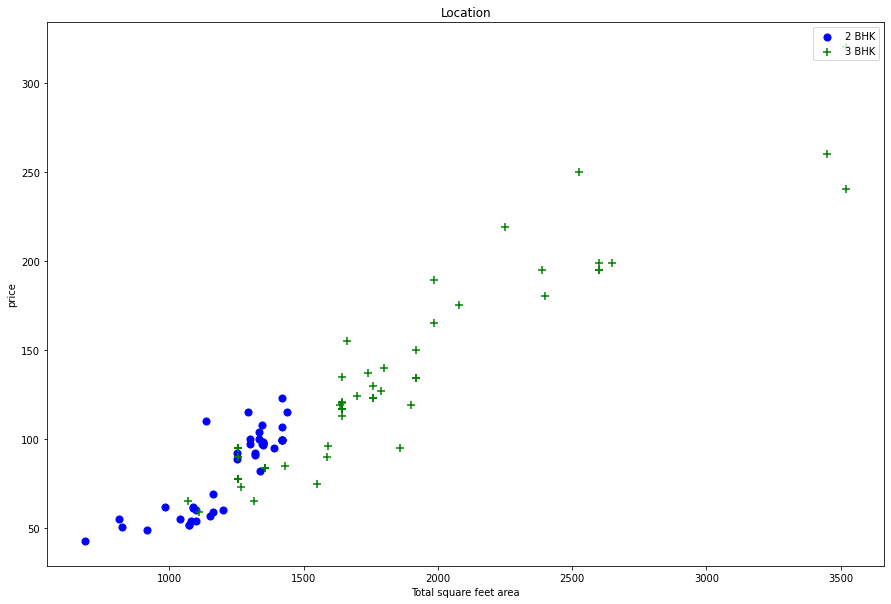

In [38]:
scatter_plot_chart(df2,"Hebbal")

In [39]:
# removing data point which are consideing with each other

def remove_bhk_outlier(df):
    exclude_indexes = np.array([])
    for location, location_df in df.groupby("location"):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby("Bhk"):
            bhk_stats[bhk] = {
                'mean':np.mean(bhk_df["price_per_sqft"]),
                'std' :np.std(bhk_df['price_per_sqft']),
                "count":bhk_df.shape[0]  
            }
        for bhk,bhk_df in location_df.groupby('Bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats["count"] >5:
                exclude_indexes = np.append(exclude_indexes,bhk_df[bhk_df["price_per_sqft"] < (stats['mean'])].index.values)
                #print('-'*40)
                #print(stats)
                #print(stats["count"])
                #print(exclude_indexes)
                #print('-'*40)
    return df.drop(exclude_indexes,axis=0)
    
df2  = remove_bhk_outlier(df2)
df2.shape

(7655, 7)

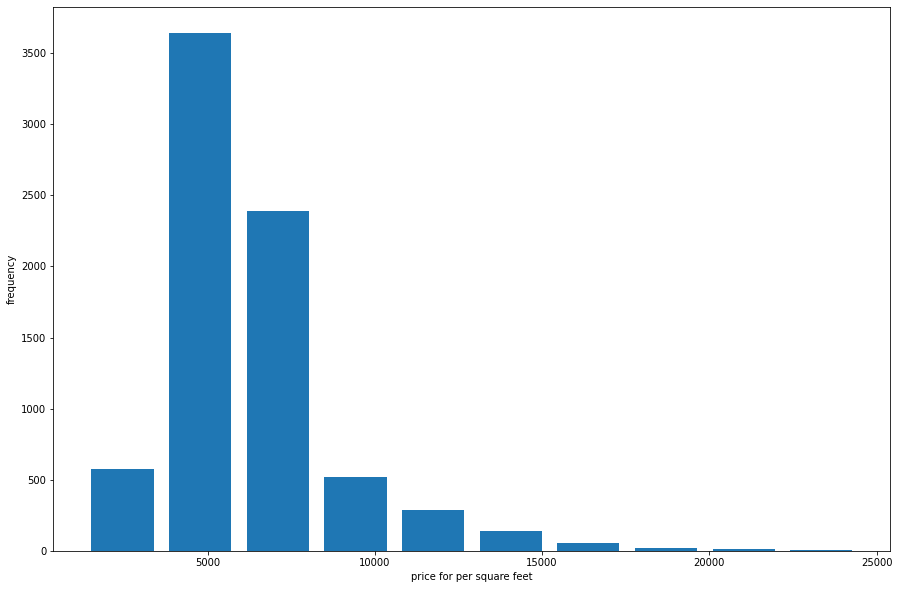

In [40]:
# with the help of this we can see most of the area in range of (0-10000/square feet)

plt.hist(df2["price_per_sqft"],bins=10,rwidth=0.8)
plt.xlabel("price for per square feet")
plt.ylabel("frequency")
plt.show()

In [41]:
df2["bath"].unique()

array([ 4.,  3.,  6.,  2.,  5.,  1.,  8., 14.,  7.,  9., 12., 10., 27.,
       16., 13.])

In [42]:
# data points which have number of bathroom more then 10
df2[df2["bath"]>10]

,location,size,total_sqft,bath,price,Bhk,price_per_sqft
607,BTM 1st Stage,9 Bedroom,3300.0,14.0,500.0,9,15151.515152
5553,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8639,other,27 BHK,8000.0,27.0,230.0,27,2875.000000
8962,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9696,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
10015,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [43]:

df2[df2["bath"]>df2['Bhk']+2]

,location,size,total_sqft,bath,price,Bhk,price_per_sqft
607,BTM 1st Stage,9 Bedroom,3300.0,14.0,500.0,9,15151.515152
1597,Chamrajpet,6 Bedroom,1500.0,9.0,230.0,6,15333.333333
1733,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5513,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
7051,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8801,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689
10029,other,6 Bedroom,1200.0,9.0,122.0,6,10166.666667


In [44]:
# we are considering only data point which have "bath==bhk+2"
# more then this we are count as a outlier
df3 =df2[df2["bath"]<df2['Bhk']+2]

In [45]:
 # removing column from data set
df4 = df3.drop(["size","price_per_sqft"],axis =1)

In [46]:
df4.head()

,location,total_sqft,bath,price,Bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1200.0,6.0,125.0,6
3,1st Block Jayanagar,1875.0,2.0,235.0,3
4,1st Block Jayanagar,1200.0,2.0,130.0,3


In [47]:
 # transforming data from category to numerical (one hot encoding)
    
dummies = pd.get_dummies(df4.location)
df5 = pd.concat([df4,dummies.drop("other",axis=1)],axis = 1)
df6 = df5.drop('location',axis = 1)
df6

,total_sqft,bath,price,Bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,6.0,125.0,6,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10622,1800.0,1.0,200.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10625,1200.0,5.0,130.0,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10626,1353.0,2.0,110.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10627,812.0,1.0,26.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
# there x are independent variable
# and y is dependent variable
x = df6.drop("price",axis=1)
y = df6["price"]
x.head()

,total_sqft,bath,Bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,6.0,6,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=121)

In [50]:
# no Null value in our dataset so now we can use for model building
x.isna().sum()

total_sqft               0
bath                     0
Bhk                      0
1st Block Jayanagar      0
1st Block Koramangala    0
                        ..
Yelachenahalli           0
Yelahanka                0
Yelahanka New Town       0
Yelenahalli              0
Yeshwanthpur             0
Length: 257, dtype: int64

In [51]:
 # Applying data model linear regression
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.8262799117889112

In [52]:

cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=121)
cross_val_score(LinearRegression(),x,y,cv=cv)

array([0.82627991, 0.85228023, 0.85194134, 0.80947304, 0.80260193])

In [53]:
# Applying different type of model on data 

def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'linear_regression': {
            'model': make_pipeline(StandardScaler(),LinearRegression()),
            'params':{}
    
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':["random","cyclic"]
            }
        },
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':["squared_error",'friedman_mse'],
                'splitter':['best','random']
            }
        }
    }
    score = []
    cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=121)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'],config["params"],cv=cv,return_train_score=False)
        gs.fit(x,y)
        score.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            "best_params":gs.best_params_
        })
    return pd.DataFrame(score,columns=["model","best_score","best_params"])

find_best_model_using_gridsearchcv(x,y)

,model,best_score,best_params
0,linear_regression,0.828515,{}
1,lasso,0.677605,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.728516,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [54]:
x.columns

Index(['total_sqft', 'bath', 'Bhk', '1st Block Jayanagar',
       '1st Block Koramangala', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=257)

In [55]:
np.where(x.columns=='1st Phase JP Nagar')[0][0]

5

In [56]:
# After applying different model linear regression giving best result 
# this function is use to predict price of house
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(x.columns==location)[0][0]
    
    x_input = np.zeros(len(x.columns))
    x_input[0] = sqft
    x_input[1] = bath
    x_input[2] = bhk
    if loc_index >=0:
        x_input[loc_index] = 1
    x_input_df = pd.DataFrame([x_input],columns=x.columns)
    return lr.predict(x_input_df)[0]

In [57]:
predict_price("1st Phase JP Nagar",1000,2,2)

86.01713703974997

In [58]:
predict_price("1st Phase JP Nagar",1000,3,3)

88.21270731442031

In [59]:
predict_price("Indira Nagar",1000,2,2)

193.13866042012307